# STOR 320 Intro to Data Science: Logistic Regression

- 1. Logistic Regression with numerical variables
- 2. Logistic Regression with categorical variables


- 3. LDA


In [44]:
import numpy as np
import pandas as pd

As usual, we summon `numpy` and `pandas` for dataset representation and manipulation.

## 1. LOGISTIC REGRESSION (ONLY NUMERICAL VARIABLES)

### 1.1 Data loading

In [45]:
loans = pd.read_csv("loans.csv")
loans.info()
loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   not.fully.paid  9516 non-null   int64  
 1   installment     9516 non-null   float64
 2   log.annual.inc  9516 non-null   float64
 3   fico            9516 non-null   int64  
 4   revol.bal       9516 non-null   float64
 5   inq.last.6mths  9516 non-null   int64  
 6   pub.rec         9516 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 520.5 KB


,not.fully.paid,installment,log.annual.inc,fico,revol.bal,inq.last.6mths,pub.rec
0,0,829.10,4.929419,737,28.854,0,0
1,0,228.22,4.812913,707,33.623,0,0
2,0,366.86,4.505150,682,3.511,1,0
3,0,162.34,4.929419,712,33.667,1,0
4,0,102.92,4.907411,667,4.740,0,0


### 1.2 Data cleaning and transformation

In Python, a convention is to name variables with underscores. This is slightly different from R. 

Let us practice how to rename columns in `Pandas`.

In [46]:
new_column_names = {'not.fully.paid':'not_fully_paid', 'log.annual.inc':'log_annual_inc',
                   'revol.bal':'revol_bal', 'inq.last.6mths':'inq_last_6mths', 'pub.rec':'pub_rec'}
loans.rename(columns = new_column_names, inplace = True)

print(loans.columns)

Index(['not_fully_paid', 'installment', 'log_annual_inc', 'fico', 'revol_bal',
       'inq_last_6mths', 'pub_rec'],
      dtype='object')


Use `df.describe()`, you can have a quick overview of the data set. Here, observe that the first four variables ('installment', 'log_annual_inc', 'fico', and 'revol_bal') takes continuous numeric values and the last two variables ('inq_last_6mths', 'pub_rec') takes ingeter numeric values.

In [47]:
loans.describe()

,not_fully_paid,installment,log_annual_inc,fico,revol_bal,inq_last_6mths,pub_rec
count,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000
mean,0.159836,320.131185,4.748642,710.841950,16.988484,1.572930,0.062211
std,0.366473,207.069870,0.265002,37.956246,33.721379,2.200329,0.262406
min,0.000000,15.670000,3.277838,612.000000,0.000000,0.000000,0.000000
25%,0.000000,164.020000,4.588821,682.000000,3.272750,0.000000,0.000000
50%,0.000000,269.545000,4.748188,707.000000,8.687500,1.000000,0.000000
75%,0.000000,435.405000,4.903323,737.000000,18.354250,2.000000,0.000000
max,1.000000,940.140000,6.309584,827.000000,1207.359000,33.000000,5.000000


### 1.3 Train-test split

In [48]:
from sklearn.model_selection import train_test_split

loans_train, loans_test = train_test_split(loans, test_size=0.3, random_state=88)
loans_train.shape, loans_test.shape

((6661, 7), (2855, 7))

In [49]:
loans_train.head()

,not_fully_paid,installment,log_annual_inc,fico,revol_bal,inq_last_6mths,pub_rec
6330,0,682.74,5.079181,697,72.682,1,0
3799,0,479.21,4.778151,677,14.180,1,0
4019,0,333.15,4.579784,702,5.520,1,0
7475,0,373.32,4.819544,782,6.449,2,0
8641,0,81.51,4.417638,662,0.558,4,0


`test_size = 0.3` means that we will put 30% of the data in the test set, 70% in the training set.

### 1.4 Baseline model

In [50]:
# How many loans have defaulted in the training set?

default_false = np.sum(loans_train['not_fully_paid'] == 0)
default_true = np.sum(loans_train['not_fully_paid'] == 1)

print(pd.Series({'0': default_false, '1': default_true}))

0    5585
1    1076
dtype: int64


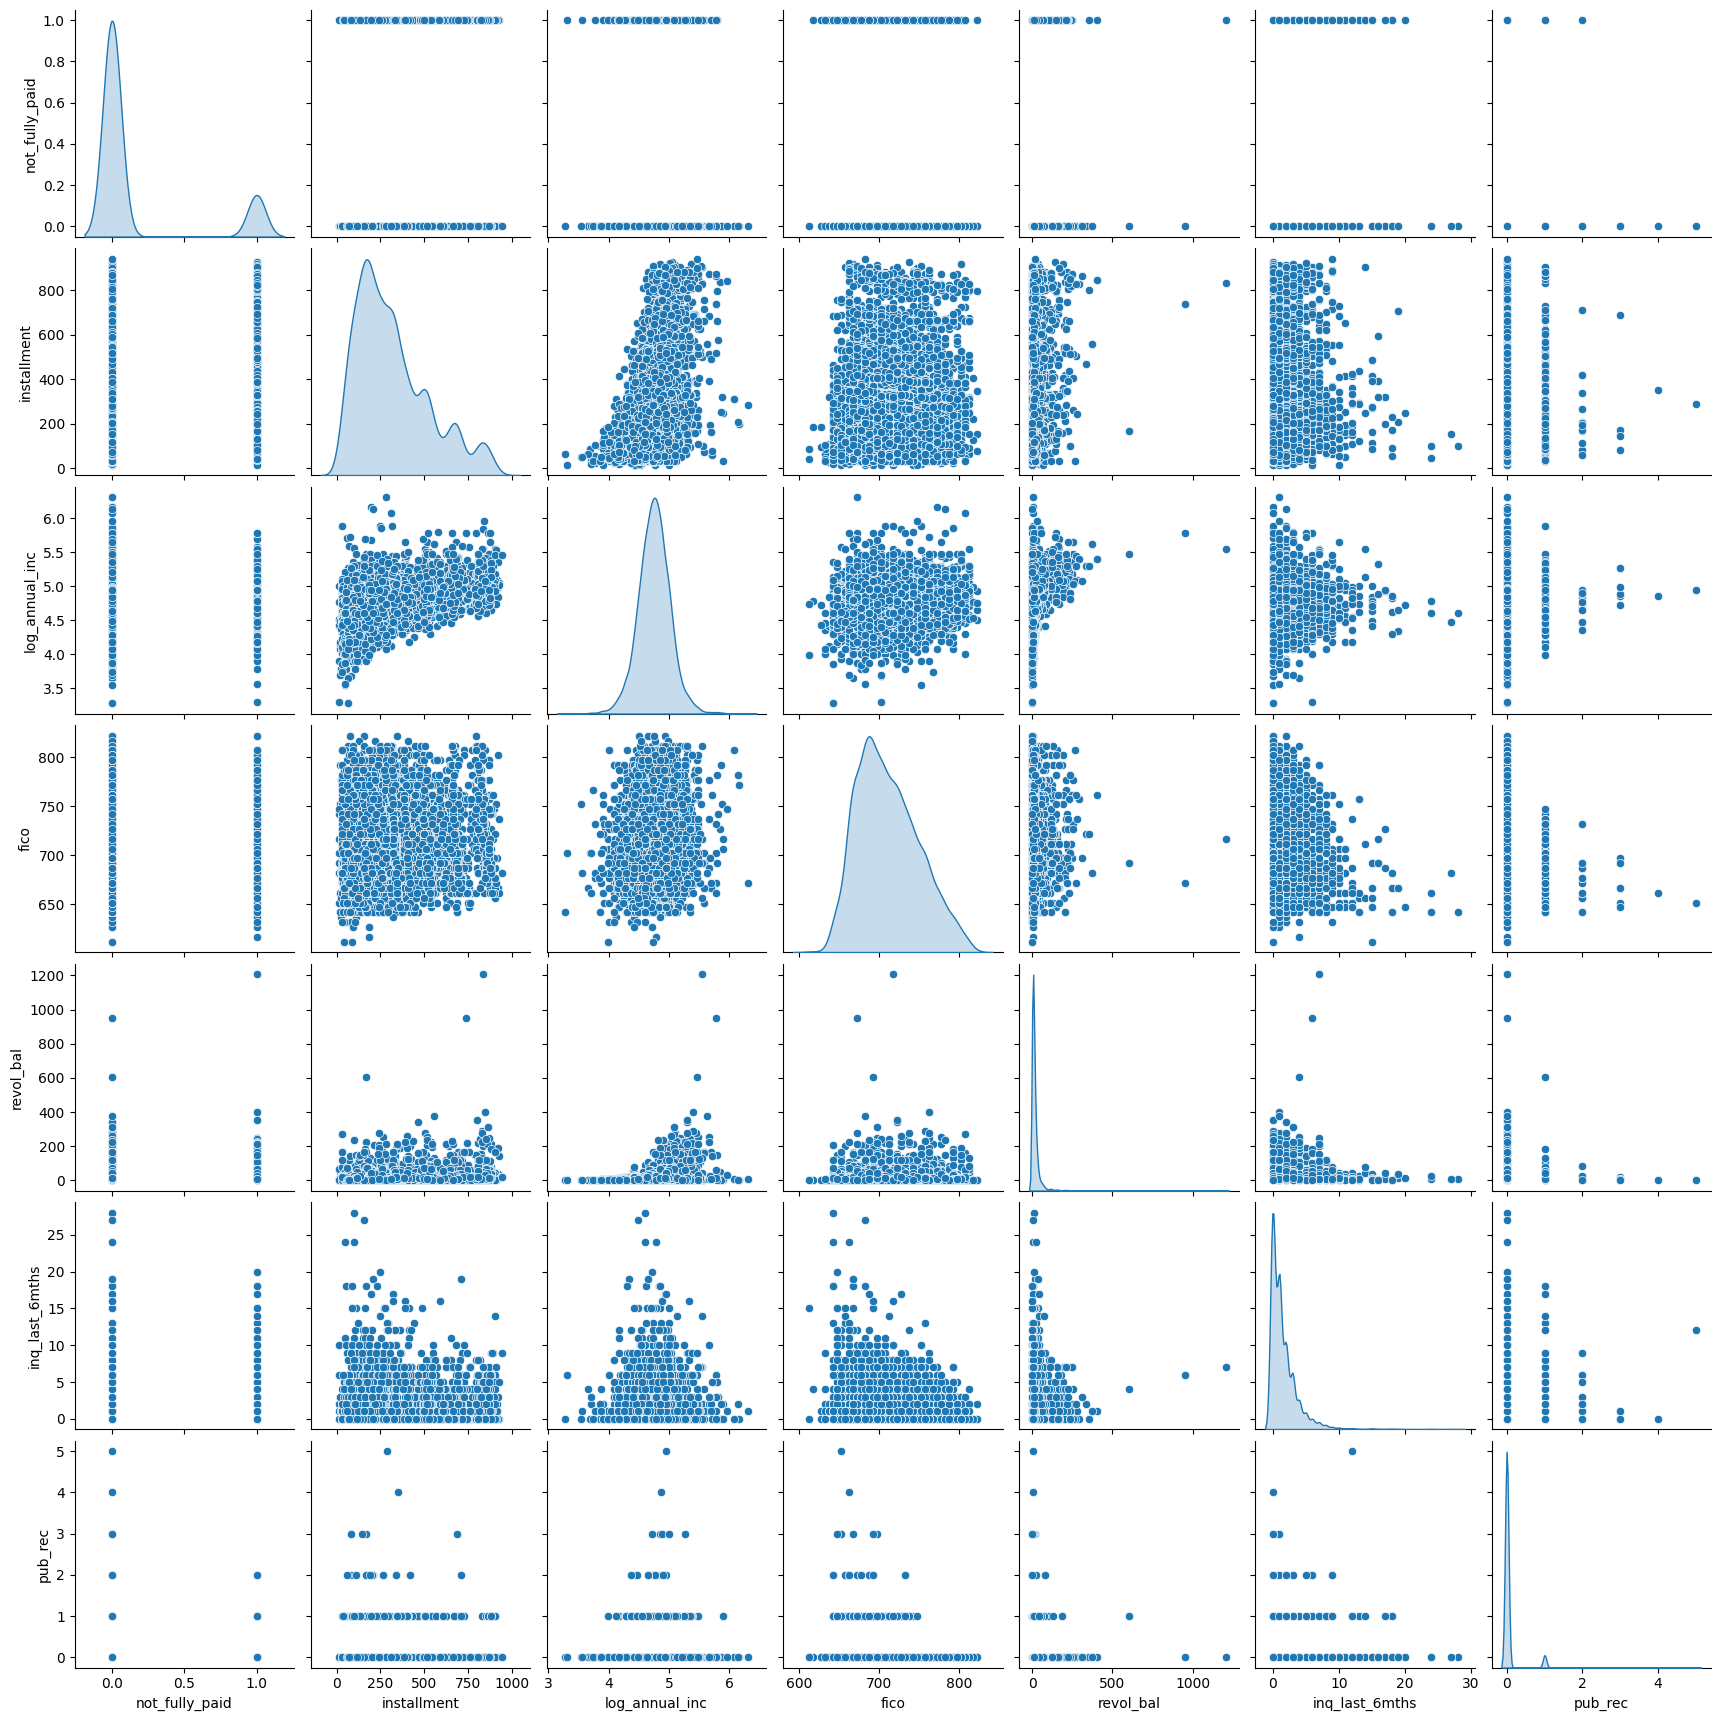

In [51]:
#use seaborn.pairplot to plot scatter plot for continuous variables
import seaborn as sns
sns.pairplot(loans_train,diag_kind='kde')

In [52]:
loans_train.corr()

,not_fully_paid,installment,log_annual_inc,fico,revol_bal,inq_last_6mths,pub_rec
not_fully_paid,1.000000,0.029430,-0.039698,-0.144830,0.040423,0.141096,0.045955
installment,0.029430,1.000000,0.452113,0.094061,0.224112,-0.005957,-0.028412
log_annual_inc,-0.039698,0.452113,1.000000,0.124615,0.362875,0.029720,0.022748
fico,-0.144830,0.094061,0.124615,1.000000,-0.010072,-0.192888,-0.142629
revol_bal,0.040423,0.224112,0.362875,-0.010072,1.000000,0.026560,-0.027113
inq_last_6mths,0.141096,-0.005957,0.029720,-0.192888,0.026560,1.000000,0.066816
pub_rec,0.045955,-0.028412,0.022748,-0.142629,-0.027113,0.066816,1.000000


A baseline model can be a so-called "dummy" model, where the classifier predicts every new observation as the majority class. In our case, for a datapoint with any given features, the baseline model will always predict 'no default'.

In [53]:
# Accuracy of baseline model based on training data:
ACC = default_false/(default_false + default_true) #Accuracy = (TP+TN)/(TP+TN+FP+FN)
ACC

0.8384626932892959

Note: we want to create models that performs better than the baseline model.

In [54]:
# EXERCISE: Compute accuracy of baseline on testing:
default_false_test = np.sum(loans_test['not_fully_paid'] == 0)
default_true_test = np.sum(loans_test['not_fully_paid'] == 1)
ACC_test = default_false_test/(default_false_test+default_true_test)
ACC_test

0.8441330998248686

In [55]:
# EXERCISE: What are the TPR and FPR rates of the baseline model? 

# True positive: the proportion of actual positives that are correctly identified as positive
# False positive: the proportion of actual negatives that are incorrectly identified as positive

TPR = 0/default_true_test # TPR = TP/P = TP/(TP+FN)
FPR = 0/default_false_test # FPR = FP/N = FP/(FP+TN)
print(TPR,FPR)

0.0 0.0


In [56]:
# EXERCISE: What are the TNR and FNR rates of the baseline model? 

# True negative: the proportion of actual negatives that are correctly identified as negative
# False negative: the proportion of actual positives that are incorrectly identified as negative

TNR = default_false_test/default_false_test # TNR = TN/N = TN/(TN+FP)
FNR = default_true_test/default_true_test # FNR = FN/P = FN/(TP+FN)
print(TNR,FNR)

1.0 1.0


### 1.5 Model Fitting (Logistic Regression)

Now we can use the statsmodels package to fit the training set to a logistic regression model

In [57]:
import statsmodels.formula.api as smf

?smf.logit

Signature: smf.logit(formula, data, subset=None, drop_cols=None, *args, **kwargs)
Docstring:
Create a Model from a formula and dataframe.

Parameters
----------
formula : str or generic Formula object
    The formula specifying the model.
data : array_like
    The data for the model. See Notes.
subset : array_like
    An array-like object of booleans, integers, or index values that
    indicate the subset of df to use in the model. Assumes df is a
    `pandas.DataFrame`.
drop_cols : array_like
    Columns to drop from the design matrix.  Cannot be used to
    drop terms involving categoricals.
*args
    Additional positional argument that are passed to the model.
**kwargs
    These are passed to the model with one exception. The
    ``eval_env`` keyword is passed to patsy. It can be either a
    :class:`patsy:patsy.EvalEnvironment` object or an integer
    indicating the depth of the namespace to use. For example, the
    default ``eval_env=0`` uses the calling namespace. If you wish
 

In [58]:
# Fit the logistic regression model

logreg = smf.logit(formula = 'not_fully_paid ~ installment + log_annual_inc + fico + revol_bal + inq_last_6mths + pub_rec',
                   data = loans_train).fit(method = 'ncg')

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.437108
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Hessian evaluations: 4
                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.01154
Time:                        18:13:06   Log-Likelihood:                -2911.6
converged:                       True   LL-Null:                       -2945.6
Covariance Type:            nonrobust   LLR p-value:                 1.067e-12
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
I

### 1.6 Predictions

In [59]:
# Example of prediction for a new observation

new_obs = pd.DataFrame(data = {'installment' : [366], 'log_annual_inc' : [4.51], 'fico' : [682],
                               'revol_bal' : [7.53], 'inq_last_6mths' : [1], 'pub_rec' : [0]})

logreg.predict(new_obs)

0    0.172312
dtype: float64

In [60]:
y_test = loans_test['not_fully_paid']

y_prob = logreg.predict(loans_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

# y_pred is the vector of probabilities as given by your model on the test set. Values between 0 and 1.
# Remember, P(Yi = 1) = 1/(1 + e^(-(b0 + b1*x1 + b2*x2 +...)) )

### 1.7 Model Evaluation - Confusion Matrix

In order to evaluate the performance of our classification model, we can make use of confusion matrix to compute a variety of useful metrics

In [61]:
from sklearn.metrics import confusion_matrix

?confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

To remind you of what each element of the confusion matrix represents:

TN FP

FN TP

In [62]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[2410    0]
 [ 445    0]]


In [86]:
# compare the confusion matrix of the baseline model
baseline_model = [0]*loans_test.shape[0] # model of all zeros
confusion_matrix(loans_test['not_fully_paid'], baseline_model)

array([[2410,    0],
       [ 445,    0]])

In [64]:
print(cm.ravel())

[2410    0  445    0]


In [65]:
# Accuracy
(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())

0.8441330998248686

Be careful about the definitions of FPR, TPR, recall, precision, sensitivity, specificity etc:
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [66]:
# EXERCISE: What is the True Positive Rate ?
TPR_logit = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
print('TPR is: %.4f' % TPR_logit)

# EXERCISE: What is the False Positive rate ?
FPR_logit = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('FPR is: %.4f' % FPR_logit)

TPR is: 0.0000
FPR is: 0.0000


In [87]:
# Now, try threshold probability = 0.4
y_pred_40perc = pd.Series([1 if x > 0.4 else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(y_test, y_pred_40perc)
print ("Confusion Matrix : \n", cm) 
# EXERCISE: What is the Accuracy?
acc= (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print('Accuracy is: %.4f' %acc)

# EXERCISE: What is the True Positive Rate ?
TPR_logit = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
print('TPR is: %.4f' % TPR_logit)

# EXERCISE: What is the False Positive rate ?
FPR_logit = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('FPR is: %.4f' % FPR_logit)

Confusion Matrix : 
 [[1290  252]
 [ 207  361]]
Accuracy is: 0.7825
TPR is: 0.6356
FPR is: 0.1634


Take away: After running logistic regression, one can change the threshold probability. This will affect the predicted label. A smaller threshold will result in more observations being predicted as positive. 

## In-class activity: print out the confusion matrix when the threshold is 0.2

In [90]:
y_pred_20perc = pd.Series([1 if x > 0.2 else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(y_test, y_pred_20perc)
print ("Confusion Matrix : \n", cm)

acc= (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print('Accuracy is: %.4f' %acc)

TPR_logit = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
print('TPR is: %.4f' % TPR_logit)

FPR_logit = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('FPR is: %.4f' % FPR_logit)

Confusion Matrix : 
 [[997 545]
 [ 94 474]]
Accuracy is: 0.6972
TPR is: 0.8345
FPR is: 0.3534


## 2. Logistic Regression (Numerical + Categorical Variables)

### 1.1 Data Loading

In [69]:
churn = pd.read_csv("customerchurn.csv")
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   SeniorCitizen    7032 non-null   int64  
 3   PaymentMethod    7032 non-null   object 
 4   InternetService  7032 non-null   object 
 5   tenure           7032 non-null   int64  
 6   Contract         7032 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


### 1.2 Train Test Split

In [70]:
churn_train, churn_test = train_test_split(churn, test_size=0.3, random_state=88)
churn_train.shape, churn_test.shape

((4922, 7), (2110, 7))

### 1.3 Model Fitting and Variable Selection

In [71]:
logreg = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2695
Time:                        18:13:06   Log-Likelihood:                -2076.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.8982      0.213     -4

In [72]:
# Let's remove MonthlyCharges
logreg2 = smf.logit(formula = 'Churn ~ SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.422264
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4912
Method:                           MLE   Df Model:                            9
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2688
Time:                        18:13:07   Log-Likelihood:                -2078.4
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5748      0.122     -4

In [73]:
# Let's remove PaymentMethod Credit Card and PaymentMethodMailed check. How do we do this? 
# Create a new feature (dummy variable). 

churn_train2 = churn_train.copy() 
churn_train2['ElectronicCheck'] = (churn_train2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_train2.drop(columns=['PaymentMethod'], inplace=True)

# Let's do the same for test set as well

churn_test2 = churn_test.copy() 
churn_test2['ElectronicCheck'] = (churn_test2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_test2.drop(columns=['PaymentMethod'], inplace=True)

churn_test2.head()

,Churn,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
2839,1,99.60,1,Fiber optic,4,Month-to-month,1
4965,0,93.80,1,Fiber optic,13,Month-to-month,0
6686,0,96.55,0,Fiber optic,5,Month-to-month,1
4151,0,25.20,0,No,39,Two year,0
241,0,109.20,0,Fiber optic,72,Two year,0


In [74]:
logreg3 = smf.logit(formula = 'Churn ~ SeniorCitizen + ElectronicCheck + InternetService + tenure + Contract',
                       data = churn_train2).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.422336
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2687
Time:                        18:13:07   Log-Likelihood:                -2078.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.6254      0.085     -7.363     

### 1.4 Predicting the Probability and Deciding the Threshold

In [75]:
# 1. Predicting the probability of default
y_prob = logreg3.predict(churn_test2)

# 2. Determining the optimal threshold of the default probability
## price reduction = 800 and no price reduction = 1000
## 800 (1 - p/2) = 1000 (1 - p) -> p = 0.333 .
## The threshold of high churn-risk and low churn-risk is 0.333.

# 3. Predicting the label
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

### 1.5 Confusion Matrix Given a Decision Threshold

In [76]:
# Now we have our probabiltiy of default, we can construct a confusion matrix based on decision tree threshold we have computed 
# price reduction = 800 and no price reduction = 1000
# 800 (1 - p/2) = 1000 (1 - p) -> p = 0.333.
# High churn risk > 0.333.
# or high churn risk, the expected return of discount is higher than no discount, b/c the prob of retention is lower for no discount 

from sklearn.metrics import confusion_matrix
y_test = churn_test2['Churn']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1213  329]
 [ 154  414]]


change threshold

In [97]:
threshold = 1/4
y_pred = pd.Series([1 if x > threshold else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1082  460]
 [ 105  463]]


### 1.7 ROC Curves

The ROC curve plots the TPR and FPR for every break-even threshold p between 0.0 and 1.0

In [78]:
y_train = churn_train2['Churn']
X_train = churn_train2.drop(['Churn'], axis=1)

y_test = churn_test2['Churn']
X_test = churn_test2.drop(['Churn'], axis=1)

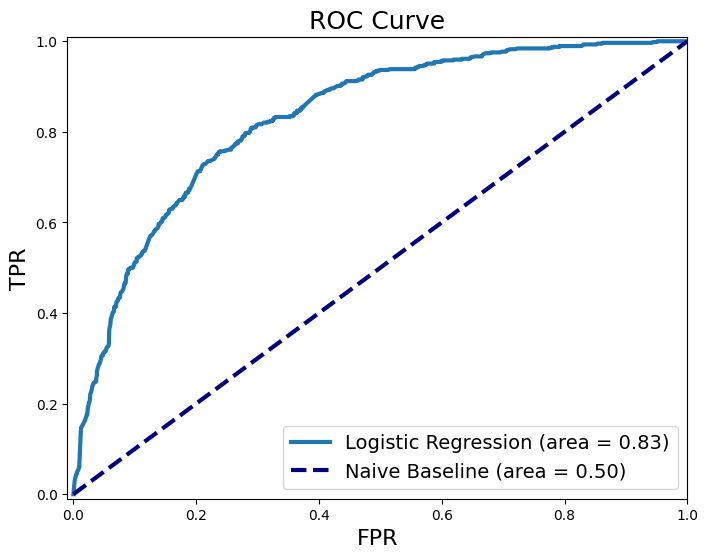

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

## 2. Linear Discriminant Analysis

### 2.1 Preliminary: one-hot encoding

In [80]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example data
df = pd.DataFrame({'Category': ['A', 'B', 'C', 'A']})

# OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Category']])
print(encoded_data)

# pd.get_dummies
dummies = pd.get_dummies(df, columns=['Category'])
print(dummies)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
   Category_A  Category_B  Category_C
0        True       False       False
1       False        True       False
2       False       False        True
3        True       False       False


In [81]:
from sklearn.preprocessing import OneHotEncoder
# initialize the OneHotEncoder
drop_enc = OneHotEncoder(drop='first').fit(X_train[['InternetService','Contract']])
print(drop_enc.categories_)

[array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object)]


In [82]:
# Perform the transformation for both the training and the test set.

X_train_categorical = drop_enc.transform(X_train[['InternetService','Contract']]).toarray()
X_train_numerical = X_train[['MonthlyCharges','SeniorCitizen','tenure']].values
# combine the numerical variables and the one-hot encoded categorical variables
X_train_transformed = np.concatenate((X_train_numerical,X_train_categorical), axis = 1)

X_test_categorical = drop_enc.transform(X_test[['InternetService','Contract']]).toarray()
X_test_numerical = X_test[['MonthlyCharges','SeniorCitizen','tenure']].values
X_test_transformed = np.concatenate((X_test_numerical,X_test_categorical), axis = 1)

### 2.2 Model Fitting and Prediction Making

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transformed, y_train)

y_prob_lda = lda.predict_proba(X_test_transformed)
y_pred_lda = pd.Series([1 if x > 1/3 else 0 for x in y_prob_lda[:,1]], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[1206  336]
 [ 163  405]]

Accuracy: 0.7635071090047393


### 2.3 Plot the ROC Curve

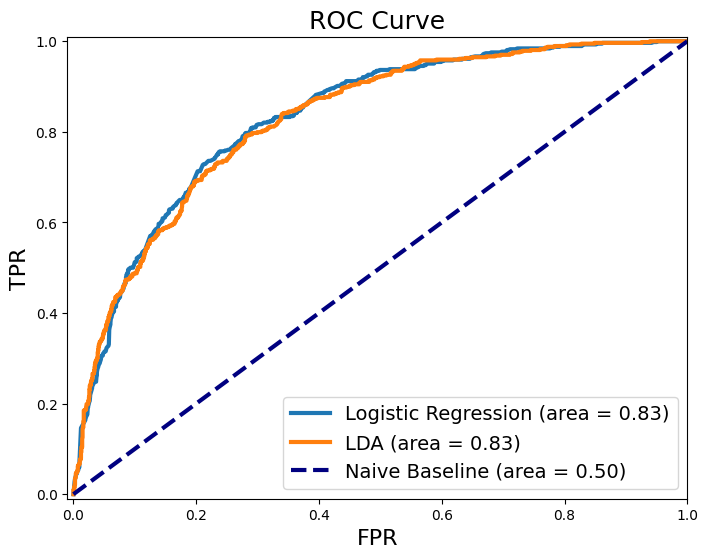

In [84]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()